In [40]:
import os
import sys

In [41]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

In [42]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [43]:
from src.train.train_linear import train_linear_model
from src.train.train_decisiontree import train_decision_tree_model
from src.train.train_randomforest import train_random_forest_model
from utils.helpers import load_processed_data, plot_predictions

In [44]:
PROCESSED_DATA_PATH = os.path.join(project_root, 'data', 'processed', 'processed_data.pkl')
MODELS_DIR = os.path.join(project_root, 'models')

In [45]:
LINEAR_MODEL_PATH = os.path.join(MODELS_DIR, 'linear_model.pkl')
DT_MODEL_PATH = os.path.join(MODELS_DIR, 'decisiontree_model.pkl')
RF_MODEL_PATH = os.path.join(MODELS_DIR, 'randomforest_model.pkl')

In [46]:
os.makedirs(MODELS_DIR, exist_ok=True)

In [47]:
print("İşlenmiş veri yükleniyor...")
data = load_processed_data(PROCESSED_DATA_PATH)

İşlenmiş veri yükleniyor...


In [48]:
targets = ['math_score', 'reading_score', 'writing_score', 'average_score']

all_results = {
    'LinearRegression': {},
    'DecisionTree': {},
    'RandomForest': {}
}

## LINEER REGRESSION

In [49]:
print("\n== Linear Regression Modellerini Eğitiyoruz ==")

for target in targets:
    print(f"\nHedef: {target}")
    model_path = LINEAR_MODEL_PATH.replace('.pkl', f'_{target}.pkl')
    model, metrics = train_linear_model(PROCESSED_DATA_PATH, model_path, target)
    all_results['LinearRegression'][target] = metrics


== Linear Regression Modellerini Eğitiyoruz ==

Hedef: math_score
Linear Regression modeli eğitiliyor (hedef: math_score)...
Eğitim veri boyutu: (800, 5)
Model performansı:
MSE: 202.8736
RMSE: 14.2434
MAE: 11.2246
R2: 0.1663
Model bilgileri kaydedildi: c:\Users\PC\Desktop\student_performance\models\linear_model_math_score_info.pkl

Hedef: reading_score
Linear Regression modeli eğitiliyor (hedef: reading_score)...
Eğitim veri boyutu: (800, 5)
Model performansı:
MSE: 196.5284
RMSE: 14.0189
MAE: 11.0474
R2: 0.1315
Model bilgileri kaydedildi: c:\Users\PC\Desktop\student_performance\models\linear_model_reading_score_info.pkl

Hedef: writing_score
Linear Regression modeli eğitiliyor (hedef: writing_score)...
Eğitim veri boyutu: (800, 5)
Model performansı:
MSE: 192.7314
RMSE: 13.8828
MAE: 10.5552
R2: 0.2003
Model bilgileri kaydedildi: c:\Users\PC\Desktop\student_performance\models\linear_model_writing_score_info.pkl

Hedef: average_score
Linear Regression modeli eğitiliyor (hedef: average_sc

## DECISION TREE

In [50]:
print("\n== Decision Tree Modellerini Eğitiyoruz ==")

# Decision Tree için parametreler
dt_params = {
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}

for target in targets:
    print(f"\nHedef: {target}")
    model_path = DT_MODEL_PATH.replace('.pkl', f'_{target}.pkl')
    model, metrics = train_decision_tree_model(PROCESSED_DATA_PATH, model_path, target, dt_params)
    all_results['DecisionTree'][target] = metrics



== Decision Tree Modellerini Eğitiyoruz ==

Hedef: math_score
Decision Tree modeli eğitiliyor (hedef: math_score)...
Eğitim veri boyutu: (800, 5)
Model performansı:
MSE: 235.2683
RMSE: 15.3385
MAE: 12.0676
R2: 0.0332
Model bilgileri kaydedildi: c:\Users\PC\Desktop\student_performance\models\decisiontree_model_math_score_info.pkl

Hedef: reading_score
Decision Tree modeli eğitiliyor (hedef: reading_score)...
Eğitim veri boyutu: (800, 5)
Model performansı:
MSE: 212.5388
RMSE: 14.5787
MAE: 11.5743
R2: 0.0607
Model bilgileri kaydedildi: c:\Users\PC\Desktop\student_performance\models\decisiontree_model_reading_score_info.pkl

Hedef: writing_score
Decision Tree modeli eğitiliyor (hedef: writing_score)...
Eğitim veri boyutu: (800, 5)
Model performansı:
MSE: 204.4939
RMSE: 14.3001
MAE: 11.0427
R2: 0.1515
Model bilgileri kaydedildi: c:\Users\PC\Desktop\student_performance\models\decisiontree_model_writing_score_info.pkl

Hedef: average_score
Decision Tree modeli eğitiliyor (hedef: average_scor

## RANDOM FOREST

In [51]:
print("\n== Random Forest Modellerini Eğitiyoruz ==")

# Random Forest için parametreler
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42,
    'n_jobs': -1  # Tüm CPU çekirdeklerini kullan
}

for target in targets:
    print(f"\nHedef: {target}")
    model_path = RF_MODEL_PATH.replace('.pkl', f'_{target}.pkl')
    model, metrics = train_random_forest_model(PROCESSED_DATA_PATH, model_path, target, rf_params)
    all_results['RandomForest'][target] = metrics


== Random Forest Modellerini Eğitiyoruz ==

Hedef: math_score
Random Forest modeli eğitiliyor (hedef: math_score)...
Eğitim veri boyutu: (800, 5)
Model performansı:
MSE: 245.7676
RMSE: 15.6770
MAE: 12.3566
R2: -0.0100
Model bilgileri kaydedildi: c:\Users\PC\Desktop\student_performance\models\randomforest_model_math_score_info.pkl

Hedef: reading_score
Random Forest modeli eğitiliyor (hedef: reading_score)...
Eğitim veri boyutu: (800, 5)
Model performansı:
MSE: 233.2201
RMSE: 15.2715
MAE: 11.8965
R2: -0.0307
Model bilgileri kaydedildi: c:\Users\PC\Desktop\student_performance\models\randomforest_model_reading_score_info.pkl

Hedef: writing_score
Random Forest modeli eğitiliyor (hedef: writing_score)...
Eğitim veri boyutu: (800, 5)
Model performansı:
MSE: 220.0143
RMSE: 14.8329
MAE: 11.3571
R2: 0.0871
Model bilgileri kaydedildi: c:\Users\PC\Desktop\student_performance\models\randomforest_model_writing_score_info.pkl

Hedef: average_score
Random Forest modeli eğitiliyor (hedef: average_sc

In [52]:
for target in targets:
    print(f"\n-- Hedef: {target} --")
    
    # Tüm modellerin sonuçlarını bir DataFrame'e dönüştürelim
    results_df = pd.DataFrame({
        'Model': [],
        'MSE': [],
        'RMSE': [],
        'MAE': [],
        'R2': []
    })
    
    for model_name, model_results in all_results.items():
        metrics = model_results[target]
        new_row = pd.DataFrame({
            'Model': [model_name],
            'MSE': [metrics['MSE']],
            'RMSE': [metrics['RMSE']],
            'MAE': [metrics['MAE']],
            'R2': [metrics['R2']]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)
    
    print(results_df)


-- Hedef: math_score --
              Model         MSE       RMSE        MAE        R2
0  LinearRegression  202.873564  14.243369  11.224583  0.166290
1      DecisionTree  235.268271  15.338457  12.067632  0.033164
2      RandomForest  245.767616  15.676977  12.356563 -0.009983

-- Hedef: reading_score --
              Model         MSE       RMSE        MAE        R2
0  LinearRegression  196.528427  14.018860  11.047404  0.131498
1      DecisionTree  212.538778  14.578710  11.574267  0.060745
2      RandomForest  233.220059  15.271544  11.896489 -0.030650

-- Hedef: writing_score --
              Model         MSE       RMSE        MAE        R2
0  LinearRegression  192.731387  13.882773  10.555200  0.200341
1      DecisionTree  204.493870  14.300135  11.042678  0.151537
2      RandomForest  220.014280  14.832878  11.357066  0.087142

-- Hedef: average_score --
              Model         MSE       RMSE        MAE        R2
0  LinearRegression  187.449583  13.691223  10.717163  0.12

In [53]:
print("\n== En İyi Performans Gösteren Modeller ==")

for target in targets:
    best_r2 = -float('inf')
    best_model = None
    
    for model_name, model_results in all_results.items():
        metrics = model_results[target]
        if metrics['R2'] > best_r2:
            best_r2 = metrics['R2']
            best_model = model_name
    
    print(f"Hedef '{target}' için en iyi model: {best_model} (R² = {best_r2:.4f})")



== En İyi Performans Gösteren Modeller ==
Hedef 'math_score' için en iyi model: LinearRegression (R² = 0.1663)
Hedef 'reading_score' için en iyi model: LinearRegression (R² = 0.1315)
Hedef 'writing_score' için en iyi model: LinearRegression (R² = 0.2003)
Hedef 'average_score' için en iyi model: LinearRegression (R² = 0.1256)


In [54]:
print("\n== En İyi Modellerin Tahminlerini Görselleştirme ==")

# En iyi performans gösteren modelin average_score için tahminlerini görselleştirelim
target = 'average_score'
best_r2 = -float('inf')
best_model_name = None

for model_name, model_results in all_results.items():
    metrics = model_results[target]
    if metrics['R2'] > best_r2:
        best_r2 = metrics['R2']
        best_model_name = model_name

print(f"'{target}' için görselleştirme yapılacak model: {best_model_name}")



== En İyi Modellerin Tahminlerini Görselleştirme ==
'average_score' için görselleştirme yapılacak model: LinearRegression


In [55]:
if best_model_name == 'LinearRegression':
    model_path = LINEAR_MODEL_PATH.replace('.pkl', f'_{target}.pkl')
elif best_model_name == 'DecisionTree':
    model_path = DT_MODEL_PATH.replace('.pkl', f'_{target}.pkl')
else:  # RandomForest
    model_path = RF_MODEL_PATH.replace('.pkl', f'_{target}.pkl')


In [62]:
with open(model_path, 'rb') as f:
    best_model = pickle.load(f)


In [64]:
# Test verilerini çıkaralım
if best_model_name == 'LinearRegression':
    X_test = data['X_test_scaled']
else:
    X_test = data['X_test']

# Hedef değişken eşleme tablosu (sizin veri yapınıza göre)
target_mapping = {
    'math_score': 'y_math_test',
    'reading_score': 'y_reading_test',
    'writing_score': 'y_writing_test',
    'average_score': 'y_avg_test'  # Sizin verinizde 'y_avg_test' olarak geçiyor
}

try:
    # Doğru hedef anahtarını al
    target_key = target_mapping[target]
    y_test = data[target_key]
    print(f"Kullanılan hedef anahtar: {target_key}")
    
except KeyError:
    # Hata durumunda detaylı bilgi ver
    print("Hata detayı:")
    print(f"Aranan hedef: {target}")
    print(f"Mevcut hedef değişkenler: {[k for k in data.keys() if 'y_' in k and 'test' in k]}")
    print("\nVeri yapısı özeti:")
    print({k: type(v) for k, v in data.items()})
    raise ValueError(f"'{target}' için hedef değişken bulunamadı. Mevcut hedef değişkenler: {list(target_mapping.values())}")

# Tahminleri yapalım
y_pred = best_model.predict(X_test)

Kullanılan hedef anahtar: y_avg_test


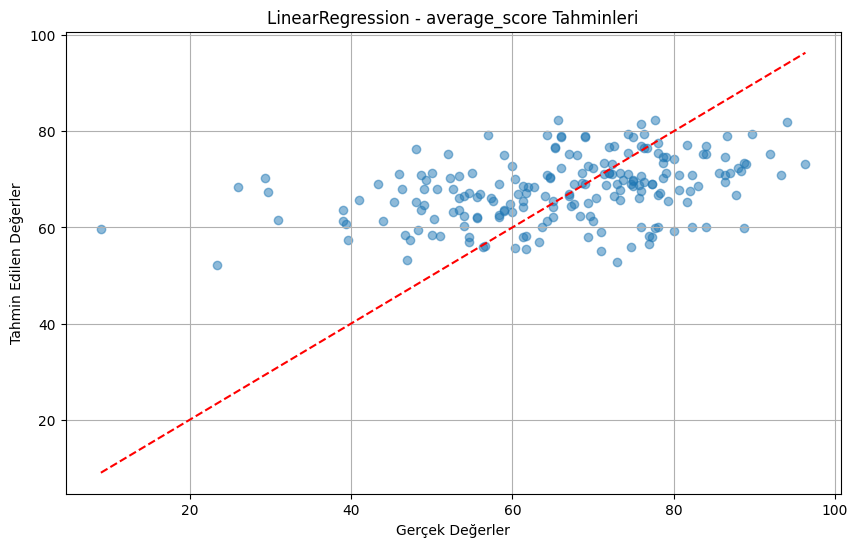

In [65]:
plt = plot_predictions(y_test, y_pred, f"{best_model_name} - {target} Tahminleri")
plt.show()


== Özellik Önemlerinin Analizi ==

LinearRegression Modeli - Özellik Önemleri:
                               Feature  Importance
3                        lunch_encoded    4.327346
1               race/ethnicity_encoded    2.212463
2  parental level of education_encoded   -0.954097
0                       gender_encoded   -2.084003
4      test preparation course_encoded   -3.902833


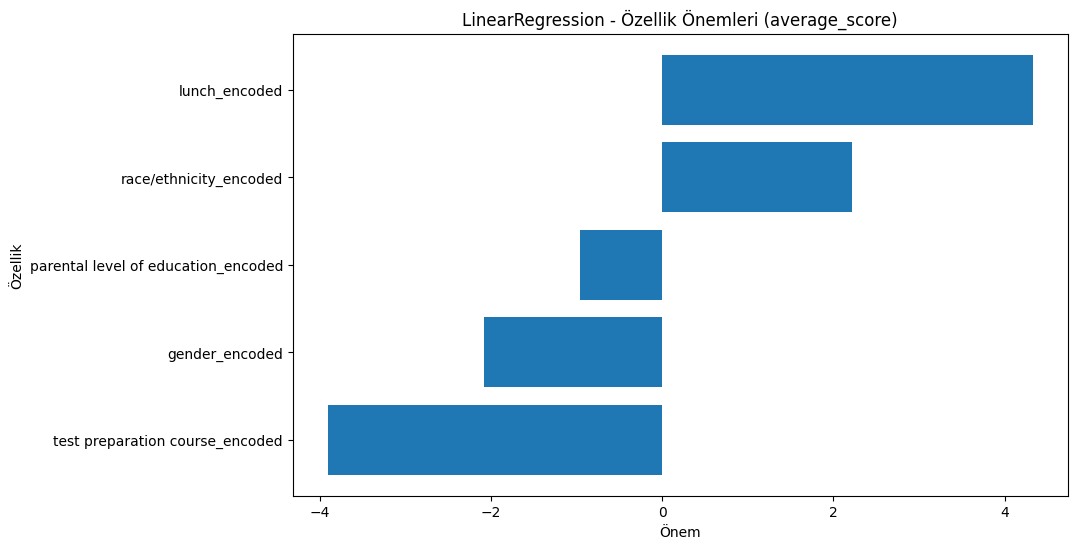


DecisionTree Modeli - Özellik Önemleri:
                               Feature  Importance
3                        lunch_encoded    0.342048
4      test preparation course_encoded    0.296261
2  parental level of education_encoded    0.138326
1               race/ethnicity_encoded    0.114463
0                       gender_encoded    0.108902


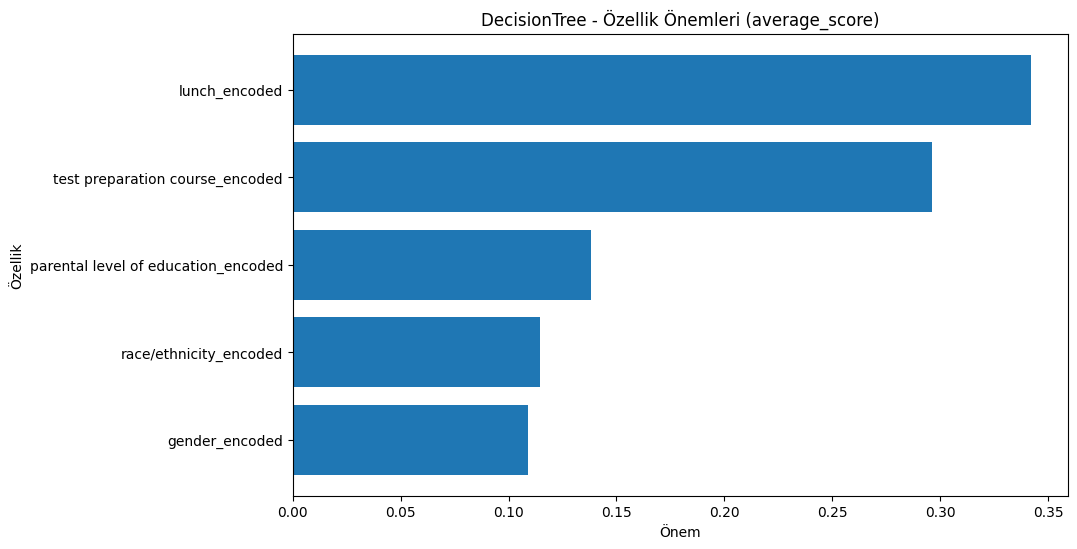


RandomForest Modeli - Özellik Önemleri:
                               Feature  Importance
2  parental level of education_encoded    0.288112
1               race/ethnicity_encoded    0.267255
3                        lunch_encoded    0.181184
4      test preparation course_encoded    0.152112
0                       gender_encoded    0.111337


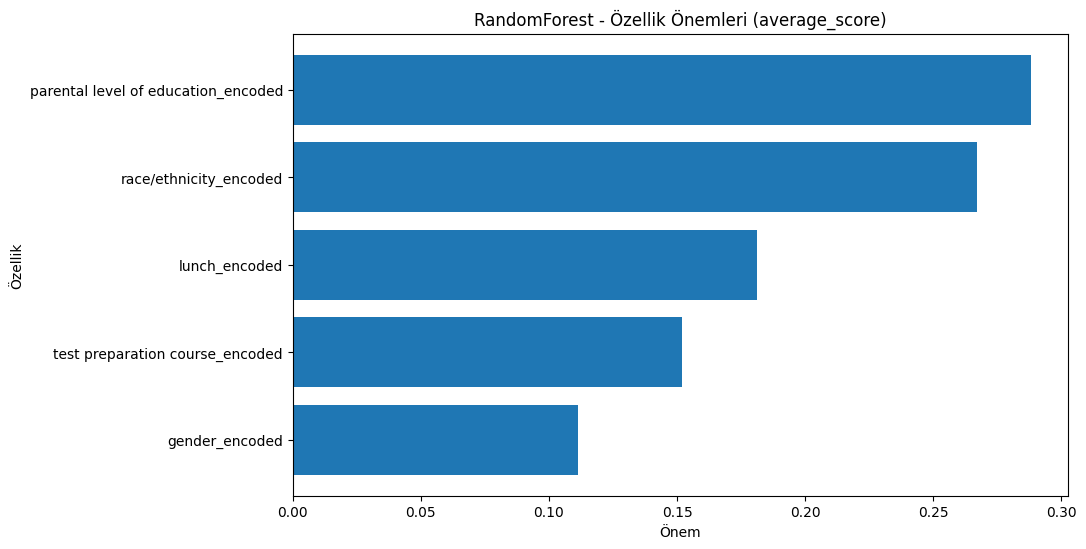

In [66]:
print("\n== Özellik Önemlerinin Analizi ==")

# Özellik isimlerini alalım
feature_cols = data['feature_cols']

# Her bir modelin özellik önemlerini gösterelim
target = 'average_score'  # Örnek olarak average_score için gösterelim

for model_name in ['LinearRegression', 'DecisionTree', 'RandomForest']:
    # Model bilgi dosyasını yükleyelim
    if model_name == 'LinearRegression':
        info_path = LINEAR_MODEL_PATH.replace('.pkl', f'_{target}_info.pkl')
    elif model_name == 'DecisionTree':
        info_path = DT_MODEL_PATH.replace('.pkl', f'_{target}_info.pkl')
    else:  # RandomForest
        info_path = RF_MODEL_PATH.replace('.pkl', f'_{target}_info.pkl')
    
    with open(info_path, 'rb') as f:
        model_info = pickle.load(f)
    
    # Özellik önemlerini alalım
    feature_importance = model_info['feature_importance']
    
    # Önemi sırala
    importance_df = pd.DataFrame({
        'Feature': list(feature_importance.keys()),
        'Importance': list(feature_importance.values())
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    print(f"\n{model_name} Modeli - Özellik Önemleri:")
    print(importance_df)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title(f"{model_name} - Özellik Önemleri ({target})")
    plt.xlabel('Önem')
    plt.ylabel('Özellik')
    plt.gca().invert_yaxis()  # En önemli özelliği üstte göstermek için
    plt.show()